#### TODO: 
    - define more functions for EDA

In [169]:
import idstools
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

In [170]:
data = pd.read_csv("../data/BikeRentalDaily_train.csv", sep=";")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,600.0,363.116667,208.711917,1.00000,181.250000,362.500000,538.250000,731.000000
season,538.0,2.436803,1.107240,1.00000,1.000000,2.000000,3.000000,4.000000
yr,600.0,0.496667,0.500406,0.00000,0.000000,0.000000,1.000000,1.000000
mnth,600.0,6.475000,3.442741,1.00000,4.000000,6.000000,9.000000,12.000000
holiday,600.0,0.030000,0.170730,0.00000,0.000000,0.000000,0.000000,1.000000
weekday,600.0,2.928333,2.079360,-1.00000,1.000000,3.000000,5.000000,6.000000
workingday,600.0,0.680000,0.466865,0.00000,0.000000,1.000000,1.000000,1.000000
weathersit,600.0,1.401667,0.542360,1.00000,1.000000,1.000000,2.000000,3.000000
temp,600.0,19.808284,7.206843,2.36520,13.575000,20.100000,26.058300,34.466700
atemp,600.0,0.473620,0.160439,0.07907,0.338256,0.489690,0.605127,0.826371


<Axes: >

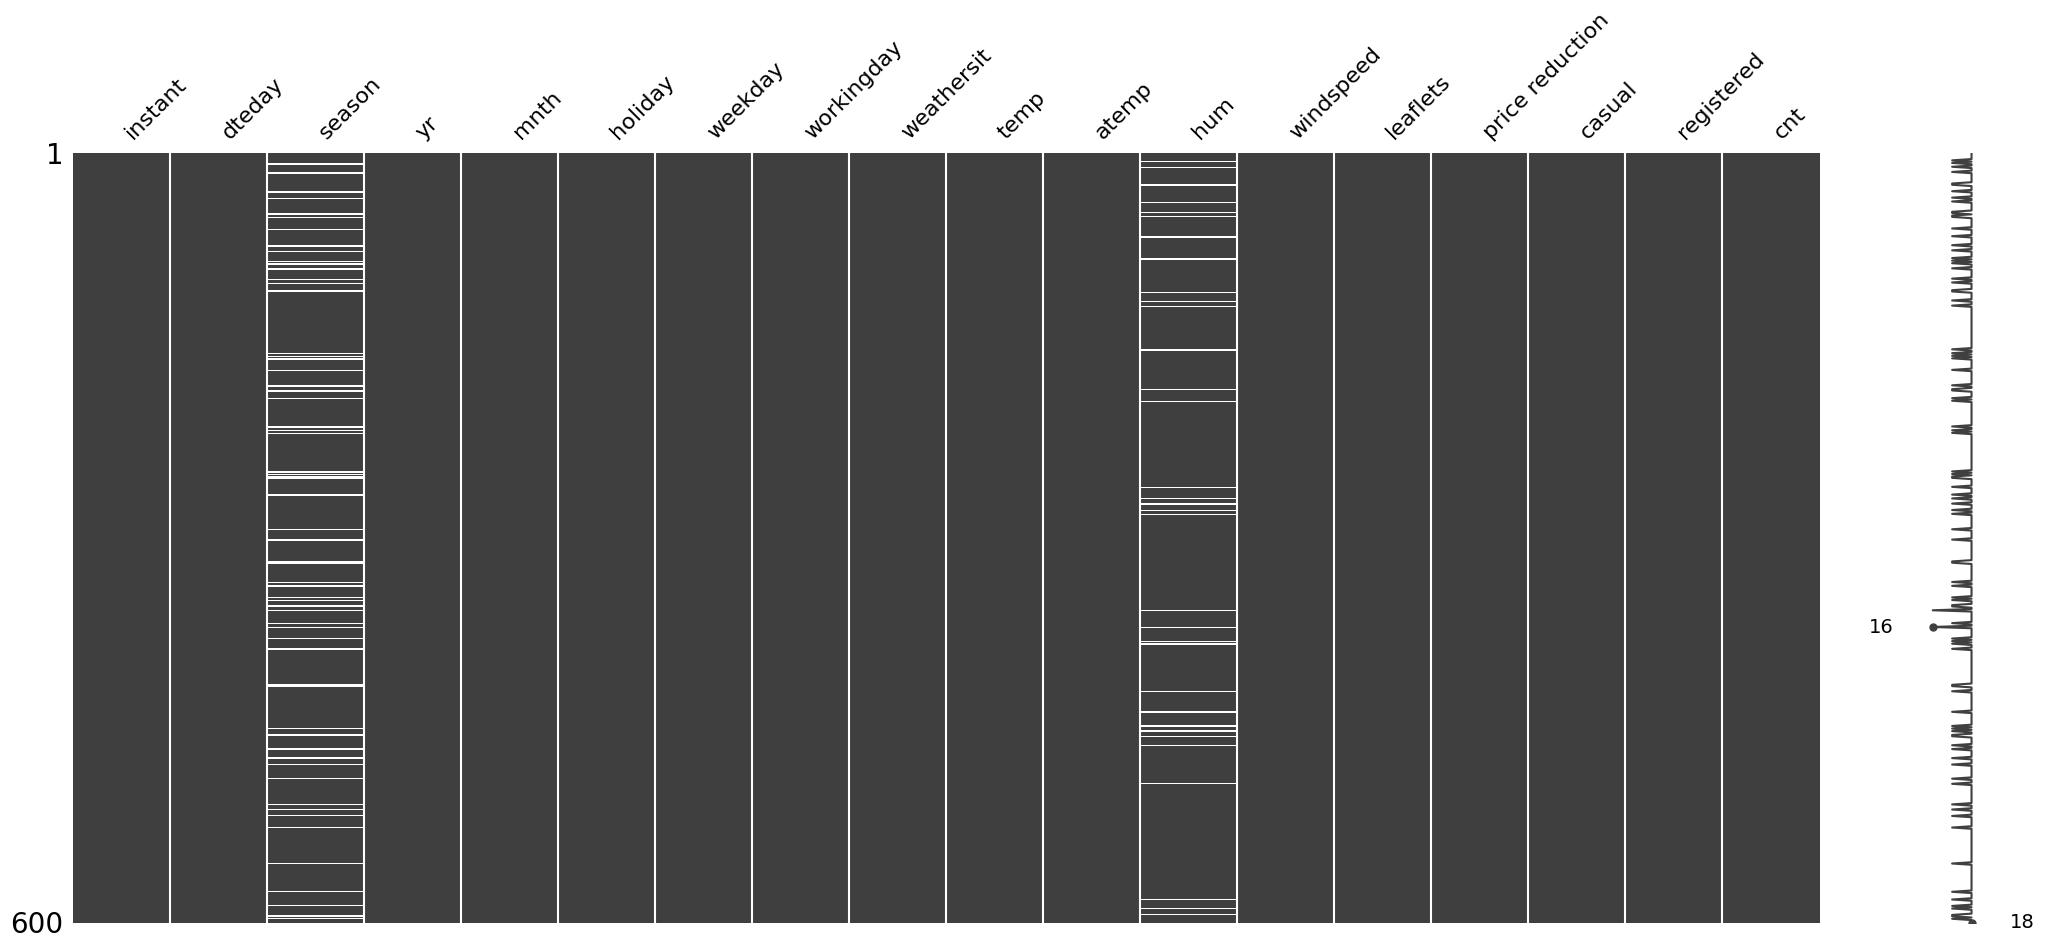

In [171]:
msno.matrix(data)

## Missing value handling ##

In [172]:
import time
def get_season_by_date(date: str):
    """Derive season by date"""
    dateformat = "%d.%m"

    # Season beginnings
    spring = time.strptime("20.03", dateformat)
    summer = time.strptime("20.06", dateformat)
    autumn = time.strptime("20.09", dateformat)
    winter = time.strptime("20.12", dateformat)

    date_p = time.strptime(date[:5], dateformat)

    if date_p < spring:
        return 1
    elif spring < date_p < summer:
        return 2
    elif summer < date_p < autumn:
        return 3
    elif autumn < date_p < winter:
        return 4
    else:
        return 1

In [173]:
def season_wrapper(row):
    row["season"] = get_season_by_date(row["dteday"])
    return row
data_new = data.apply(season_wrapper, axis=1)
data_new

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,2,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [174]:
data_new["hum"].fillna(np.mean(data_new["hum"]), inplace=True)

<Axes: >

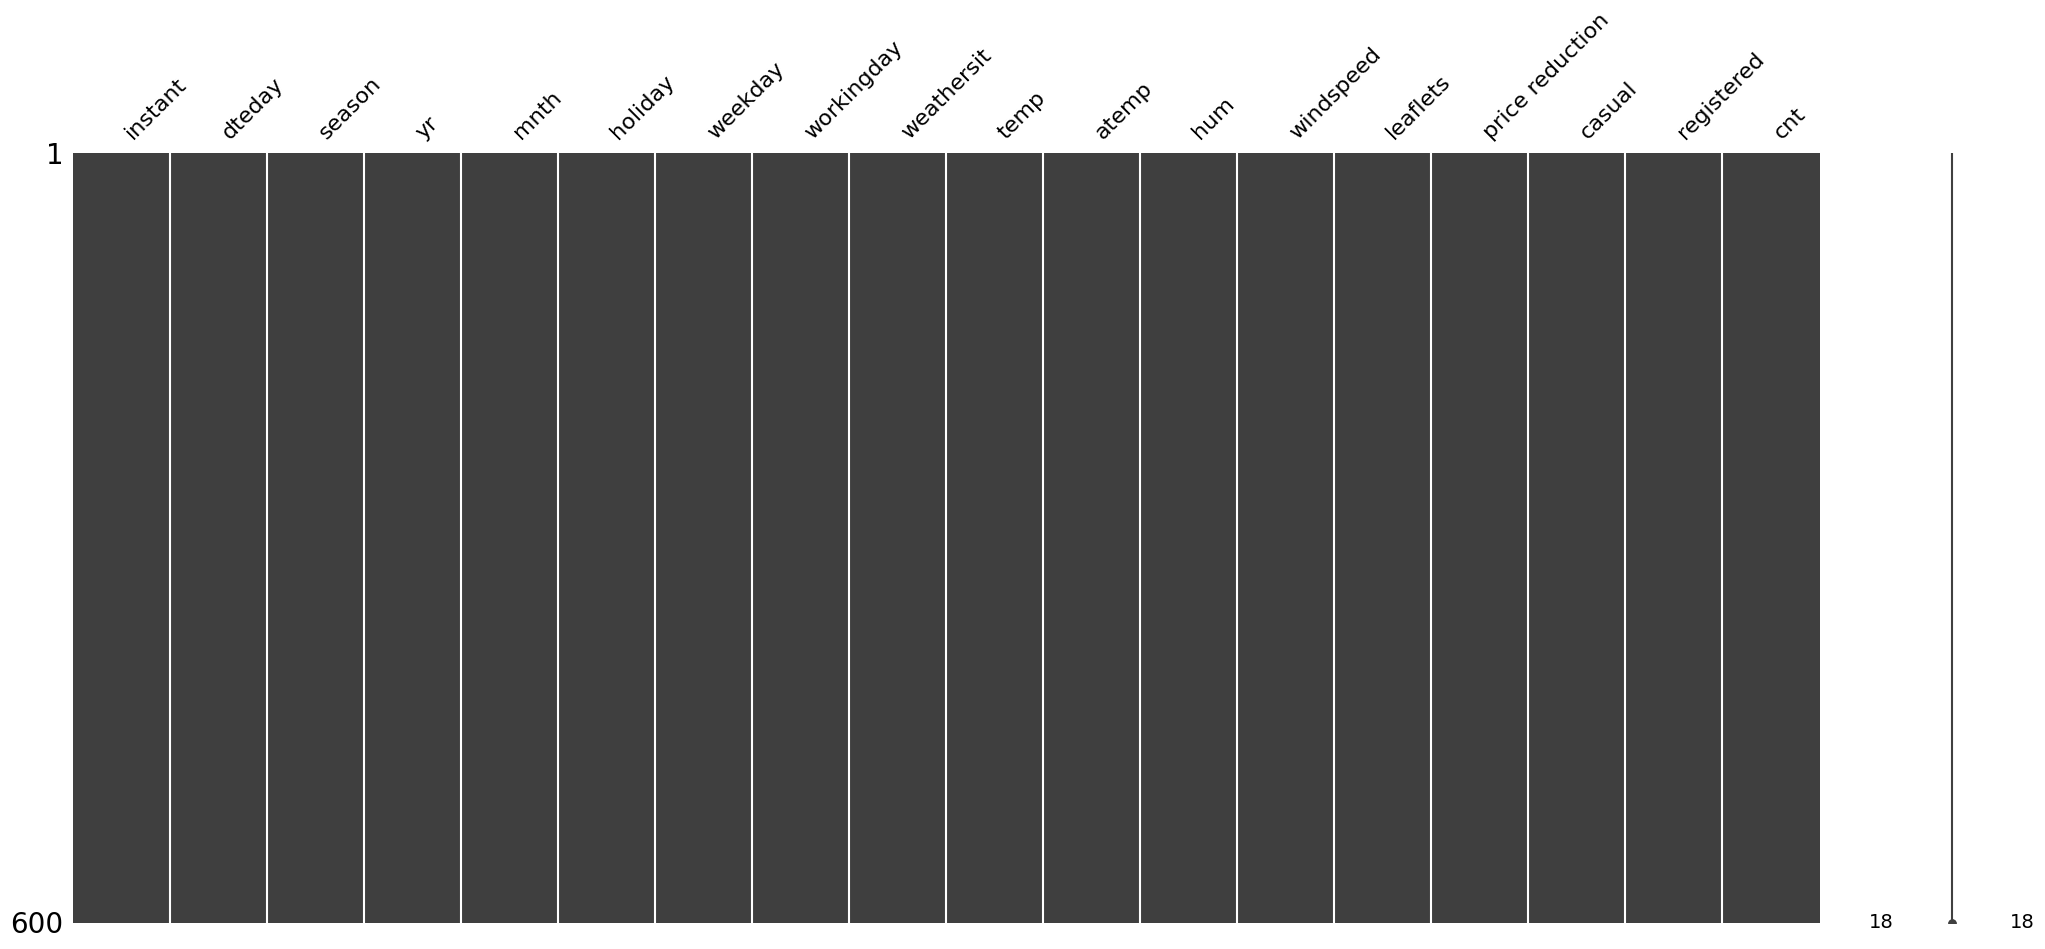

In [175]:
msno.matrix(data_new)

## Descriptive Analysis ##

In [176]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,600.0,363.116667,208.711917,1.00000,181.250000,362.500000,538.250000,731.000000
season,600.0,2.445000,1.119105,1.00000,1.000000,2.000000,3.000000,4.000000
yr,600.0,0.496667,0.500406,0.00000,0.000000,0.000000,1.000000,1.000000
mnth,600.0,6.475000,3.442741,1.00000,4.000000,6.000000,9.000000,12.000000
holiday,600.0,0.030000,0.170730,0.00000,0.000000,0.000000,0.000000,1.000000
weekday,600.0,2.928333,2.079360,-1.00000,1.000000,3.000000,5.000000,6.000000
workingday,600.0,0.680000,0.466865,0.00000,0.000000,1.000000,1.000000,1.000000
weathersit,600.0,1.401667,0.542360,1.00000,1.000000,1.000000,2.000000,3.000000
temp,600.0,19.808284,7.206843,2.36520,13.575000,20.100000,26.058300,34.466700
atemp,600.0,0.473620,0.160439,0.07907,0.338256,0.489690,0.605127,0.826371


Der Wochentag `-1` ist offensichtlich ein fehlender Wert, der behoben werden muss.

In [177]:
def get_wday_by_date(row):
    if row["weekday"] > 0:
        return row
    weekday_shift = { # week starts on Sunday in dataset
        6: 0,
        0: 1,
        1: 2,
        2: 3,
        3: 4,
        4: 5,
        5: 6
    }
    dateformat = "%d.%m.%Y"
    row["weekday"] = weekday_shift[time.strptime(row["dteday"], dateformat).tm_wday]
    return row
data_new = data_new.apply(get_wday_by_date, axis=1)

Es ist zu sehen, dass die Gesamtanzahl und die Zahl der nicht registrierten Nutzer einen sehr hohen Maximalwert haben. Die Gesamtzahl wird aus registrierten Nutzern + nicht registrierten Nutzern hergeleitet -> Die Outlier werden mittels der `casual` Spalte ermittelt.

In [178]:
from scipy import stats
zscores = stats.zscore(data_new["casual"])
thresh = 3.0
outliers = data_new[abs(zscores) > thresh]
outliers

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
298,631,22.09.2012,4,1,9,0,6,0,1,26.0000,0.610488,97.00005,0.283583,963,0,47138,5883,53021
370,505,19.05.2012,2,1,5,0,6,0,1,24.0000,0.566908,68.43750,0.083975,1030,0,38061,4884,42945
432,448,23.03.2012,2,1,3,0,5,1,2,24.0667,0.570067,104.12505,0.116300,535,1,26150,5893,32043
485,624,15.09.2012,3,1,9,0,6,0,1,24.3333,0.585867,75.25005,0.247521,820,0,30378,5554,35932


Diese Werte werden entfernt

In [179]:
data_no_out = data_new.drop(outliers.index, errors="ignore")

<Axes: >

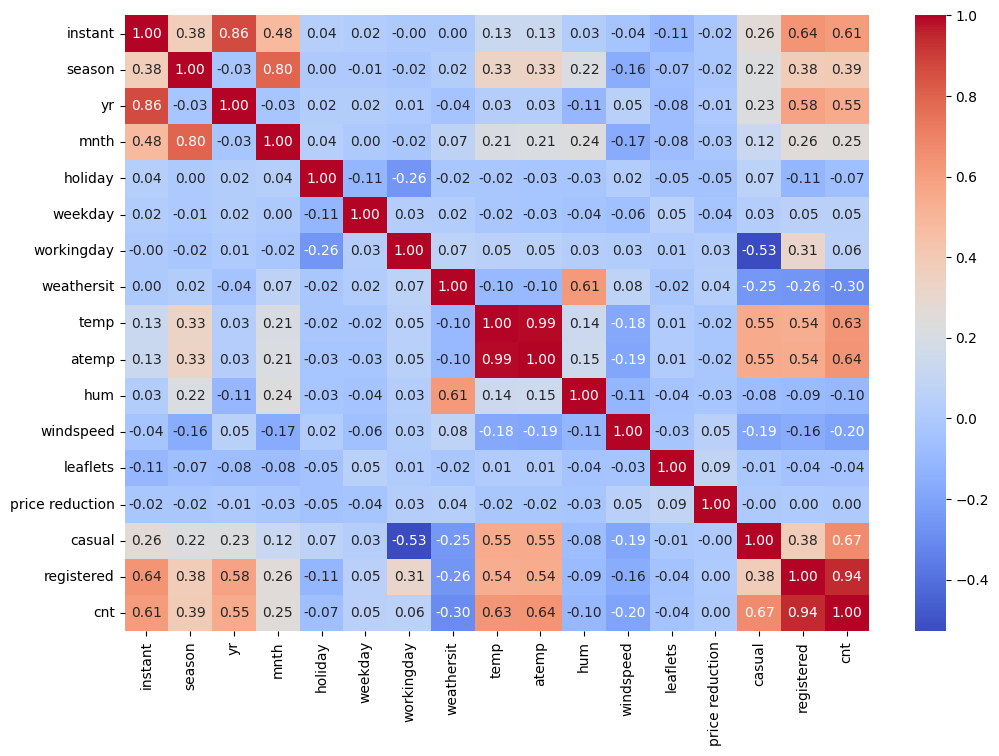

In [180]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_out.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")

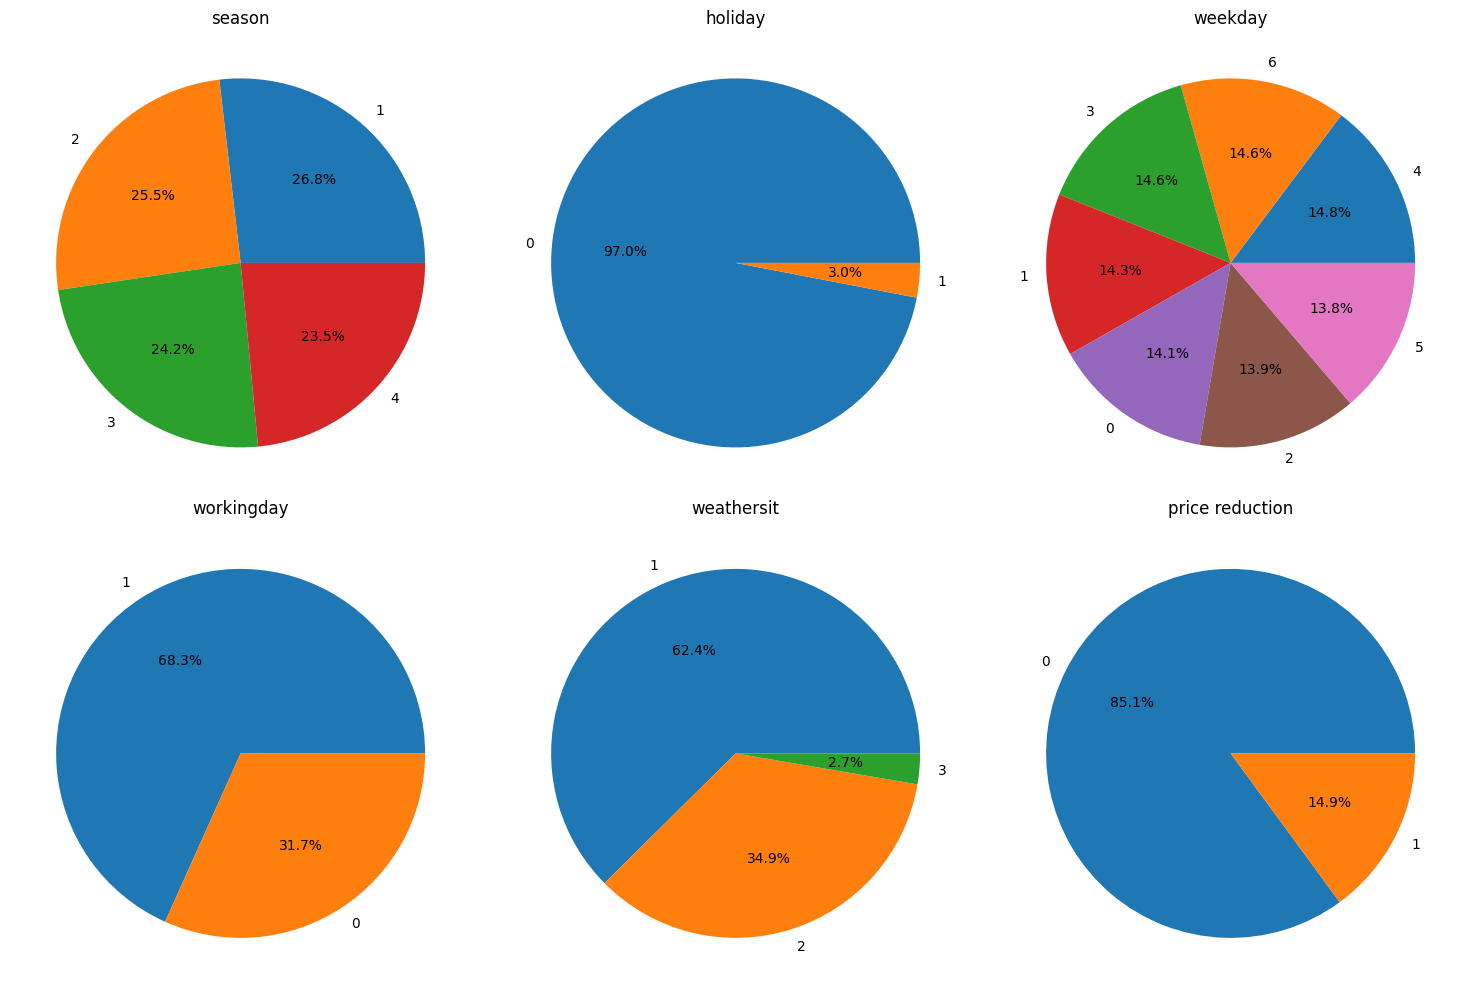

In [181]:
plt.figure(figsize=(15, 10))
features = ["season", "holiday", "weekday", "workingday", "weathersit", "price reduction"]
for i, var in enumerate(features, 1):
    v_counts = data_no_out[var].value_counts()
    plt.subplot(2, 3, i)
    plt.pie(x=v_counts, labels=v_counts.index, autopct='%1.1f%%')
    plt.title(var)

plt.tight_layout()
plt.show()

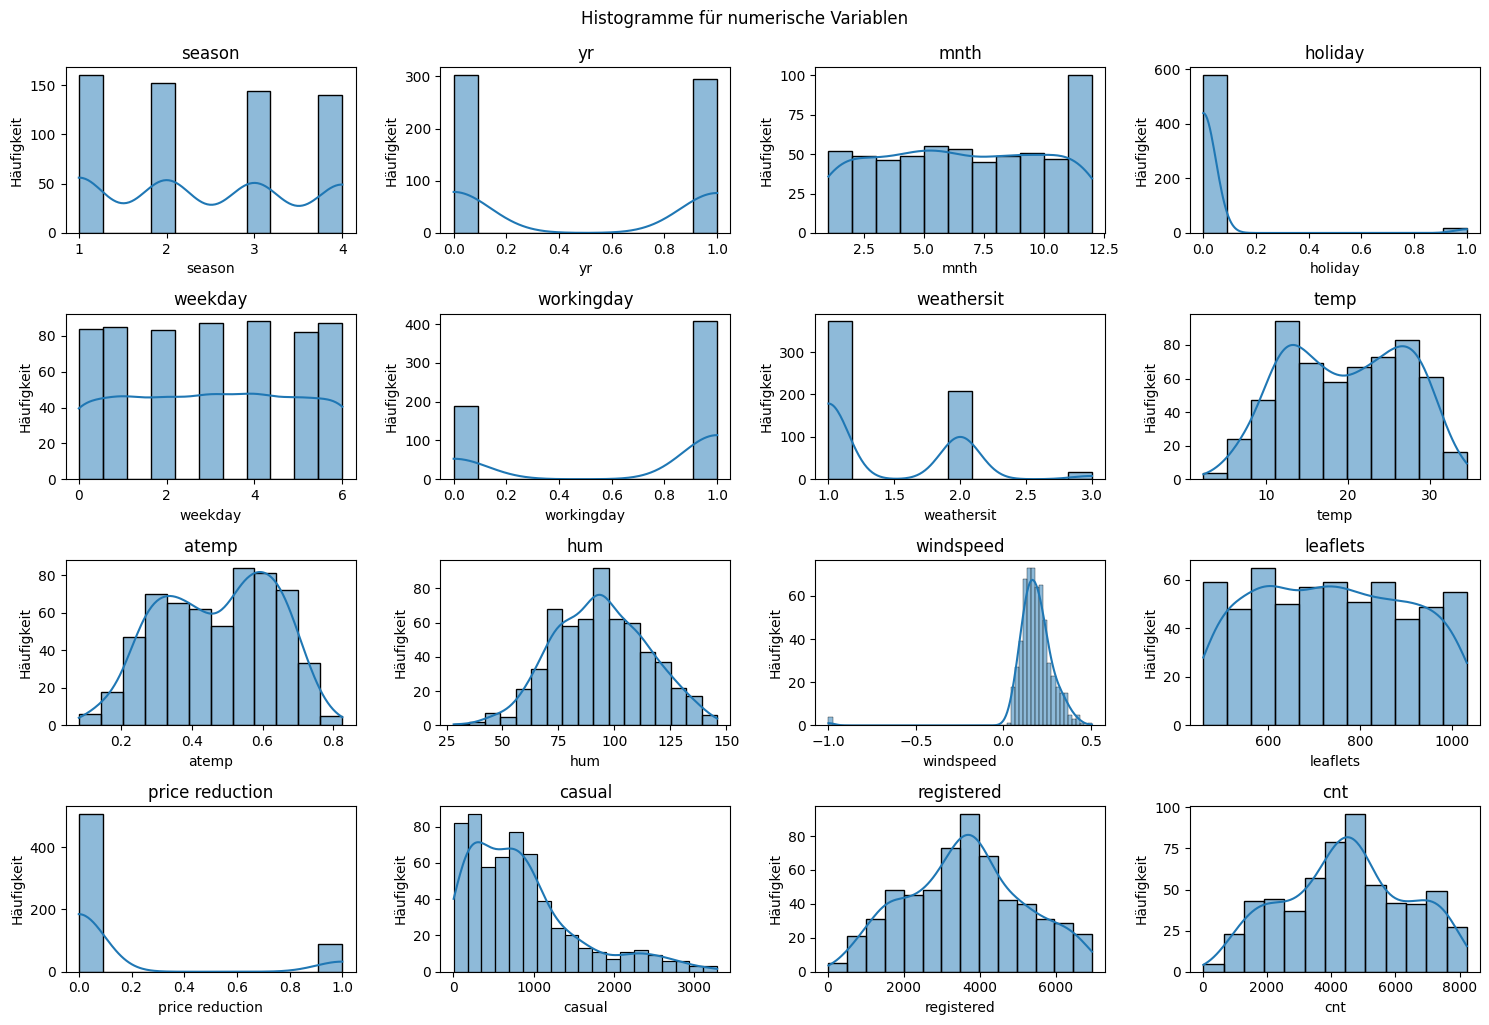

In [182]:
plt.figure(figsize=(15, 10))
features = [f for f in data_no_out.columns.tolist() if f not in ["instant", "dteday"]]
for i, var in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data_no_out[var], kde=True)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.suptitle("Histogramme für numerische Variablen", y=1.02)
plt.show()

## Data Transformation

### Dummies / One Hot Encoding ###

In [184]:
data_d = pd.concat([data_no_out, pd.get_dummies(data_no_out["weekday"], prefix="weekday", dtype=int)], axis=1)
data_d = pd.concat([data_d, pd.get_dummies(data_no_out["weathersit"], prefix="weathersit", dtype=int)], axis=1)
data_d.drop(columns=["weekday", "weathersit"], inplace=True)

In [185]:
data_d

,instant,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,154,03.06.2011,2,0,6,0,1,24.8000,0.587133,53.12505,...,0,0,0,0,0,1,0,1,0,0
1,685,15.11.2012,4,1,11,0,1,12.8667,0.324492,93.06255,...,0,0,0,0,1,0,0,0,1,0
2,368,03.01.2012,1,1,1,0,1,6.0000,0.126275,66.18750,...,0,0,1,0,0,0,0,1,0,0
3,472,16.04.2012,2,1,4,1,0,26.5667,0.614925,84.25005,...,0,1,0,0,0,0,0,1,0,0
4,442,17.03.2012,1,1,3,0,0,20.5667,0.505046,113.37495,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1,0,3,0,0,18.9000,0.466525,56.87505,...,0,0,0,0,0,0,1,1,0,0
596,81,22.03.2011,2,0,3,0,1,17.6667,0.440642,93.68745,...,0,0,1,0,0,0,0,1,0,0
597,377,12.01.2012,1,1,1,0,1,15.3000,0.381938,120.43755,...,0,0,0,0,1,0,0,0,1,0
598,299,26.10.2011,4,0,10,0,1,19.3667,0.472846,108.06255,...,0,0,0,1,0,0,0,0,1,0


In [193]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, output_distribution='normal',random_state=0)
data_tf = data_d.drop(columns=["dteday", "instant"])
data_tf = qt.fit_transform(data_tf)